In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [21]:
data_1= pd.read_csv('Ecommerce Customers1.csv')
data_1.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [23]:
data_1.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [24]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


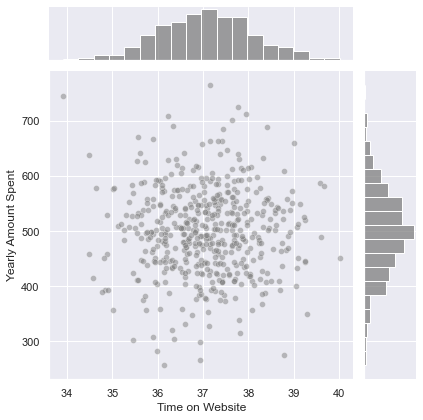

In [25]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=data_1,color='gray',alpha=0.5)


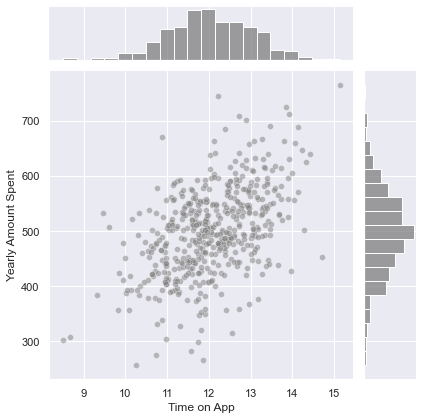

In [26]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=data_1,color='gray',alpha=0.5)


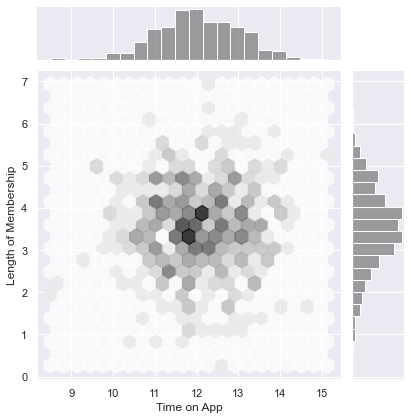

In [28]:
sns.jointplot(x='Time on App',y='Length of Membership',data=data_1,kind='hex',color='gray',alpha=0.75)


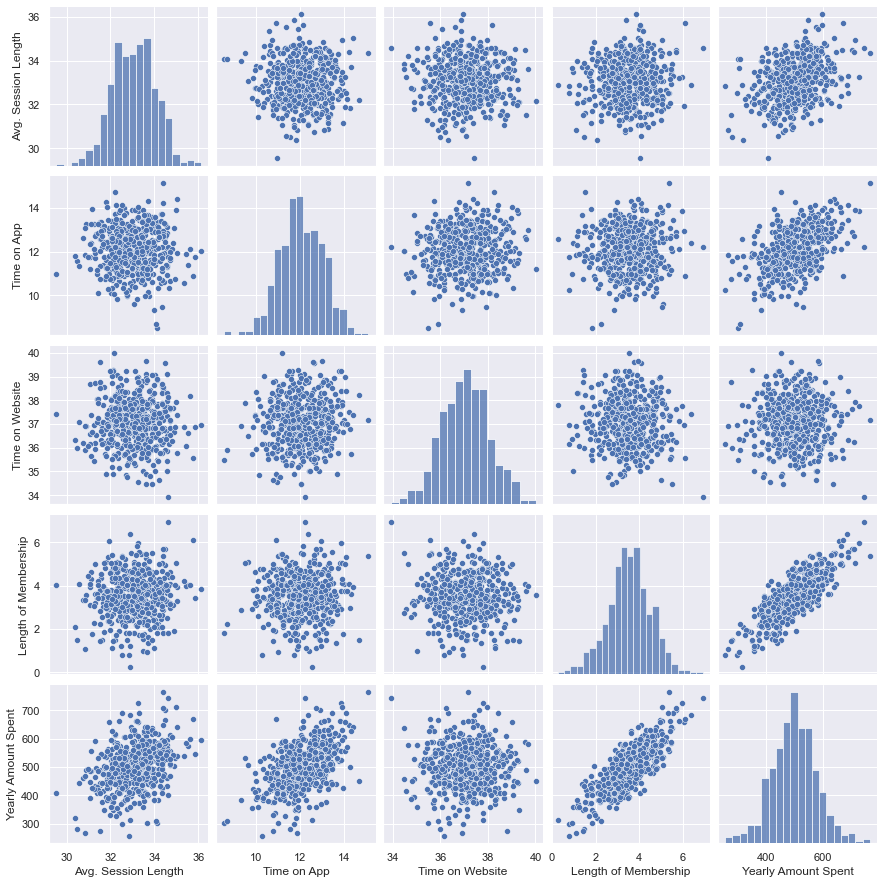

In [29]:
sns.pairplot(data_1)

In [30]:
print("Length of Membership")

Length of Membership


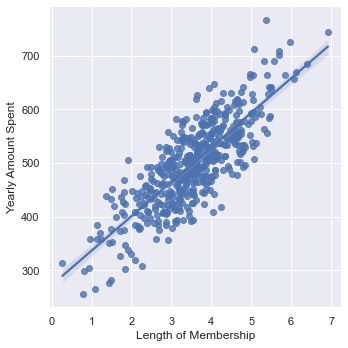

In [31]:
sns.set(color_codes=True)
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=data_1)


In [33]:
A=data_1[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]

In [34]:

B=data_1['Yearly Amount Spent']

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(A,B,test_size=0.3,random_state=101)

In [14]:

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [40]:

print('Coefficients:\n',model.coef_)

Coefficients:
 [25.98154972 38.59015875  0.19040528 61.27909654]


In [41]:
predict_1 = model.predict(X_test)

Text(0.5, 0, 'Y test')

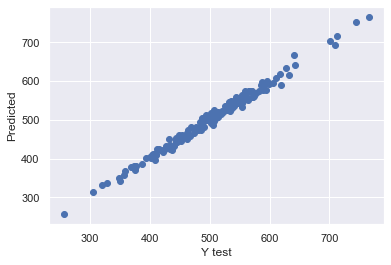

In [42]:
plt.pyplot.scatter(y_test,predict_1)
plt.pyplot.ylabel('Predicted')
plt.pyplot.xlabel('Y test')

In [45]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y_test,predict_1)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test,predict_1)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test,predict_1))))


MAE: 7.228148653430845
MSE: 79.81305165097471
RMSE: 8.93381506697865


C:\Users\AVINASH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

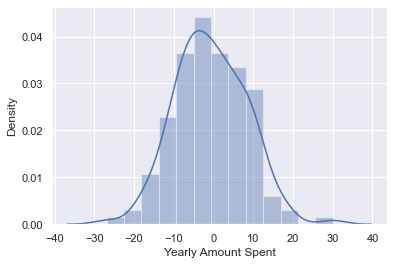

In [43]:

sns.distplot((y_test-predict_1))

In [44]:
pd.DataFrame(model.coef_,A.columns,columns=['Coeffecient'])

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
